In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_path = "../data/processed"
labels = ['normal', 'pneumonia']
img_size = 224

In [8]:
# check for class distribution
normal_count = 0
pneumonia_count = 0

for label in labels:
    path = os.path.join(data_path, label)
    files = os.listdir(path)
    total_files = len(files)

    print(f"{label} : {total_files}")


normal : 2932
pneumonia : 8546


In [18]:
# check image dimensions

for label in labels:
    path = os.path.join(data_path, label)
    files = os.listdir(path)

    for i, img in enumerate(files):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Error: Could not open the image at {img}")
        else:
            height, width, channels = image.shape
            print(f"Height: {height} pixels, Width: {width} pixels, Channels: {channels}")

Height: 1446 pixels, Width: 1654 pixels, Channels: 3
Height: 1144 pixels, Width: 1674 pixels, Channels: 3
Height: 1164 pixels, Width: 1414 pixels, Channels: 3
Height: 1008 pixels, Width: 1288 pixels, Channels: 3
Height: 1746 pixels, Width: 1850 pixels, Channels: 3
Height: 1522 pixels, Width: 1940 pixels, Channels: 3
Height: 2234 pixels, Width: 2359 pixels, Channels: 3
Height: 1777 pixels, Width: 1952 pixels, Channels: 3
Height: 1067 pixels, Width: 1422 pixels, Channels: 3
Height: 1357 pixels, Width: 1828 pixels, Channels: 3
Height: 1495 pixels, Width: 1854 pixels, Channels: 3
Height: 920 pixels, Width: 1306 pixels, Channels: 3
Height: 1430 pixels, Width: 1712 pixels, Channels: 3
Height: 1966 pixels, Width: 2194 pixels, Channels: 3
Height: 1963 pixels, Width: 2172 pixels, Channels: 3
Height: 1453 pixels, Width: 1588 pixels, Channels: 3
Height: 1665 pixels, Width: 1902 pixels, Channels: 3
Height: 1136 pixels, Width: 1554 pixels, Channels: 3
Height: 1086 pixels, Width: 1284 pixels, Channe

In [23]:
# load data

def load_data(data_path):
    data = []
    labels_list = []
    for label in labels:
        path = os.path.join(data_path, label)
        class_num = labels.index(label)
        files = os.listdir(path)
        total_files = len(files)

        print(f"Loading {label} images ({total_files} files)")

        for i, img in enumerate(files):
            if i % 100 == 0:
                print(f" Progress: {i}/{total_files}")

            img_path = os.path.join(path, img)
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img_arr is not None:
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append(resized_arr)
                labels_list.append(class_num)
            else:
                print(f"Warning: Unable to read image {img_path}")

    return np.array(data), np.array(labels_list)

Loading normal images (2932 files)
 Progress: 0/2932
 Progress: 100/2932
 Progress: 200/2932
 Progress: 300/2932
 Progress: 400/2932
 Progress: 500/2932
 Progress: 600/2932
 Progress: 700/2932
 Progress: 800/2932
 Progress: 900/2932
 Progress: 1000/2932
 Progress: 1100/2932
 Progress: 1200/2932
 Progress: 1300/2932
 Progress: 1400/2932
 Progress: 1500/2932
 Progress: 1600/2932
 Progress: 1700/2932
 Progress: 1800/2932
 Progress: 1900/2932
 Progress: 2000/2932
 Progress: 2100/2932
 Progress: 2200/2932
 Progress: 2300/2932
 Progress: 2400/2932
 Progress: 2500/2932
 Progress: 2600/2932
 Progress: 2700/2932
 Progress: 2800/2932
 Progress: 2900/2932
Loading pneumonia images (8546 files)
 Progress: 0/8546
 Progress: 100/8546
 Progress: 200/8546
 Progress: 300/8546
 Progress: 400/8546
 Progress: 500/8546
 Progress: 600/8546
 Progress: 700/8546
 Progress: 800/8546
 Progress: 900/8546
 Progress: 1000/8546
 Progress: 1100/8546
 Progress: 1200/8546
 Progress: 1300/8546
 Progress: 1400/8546
 Progr

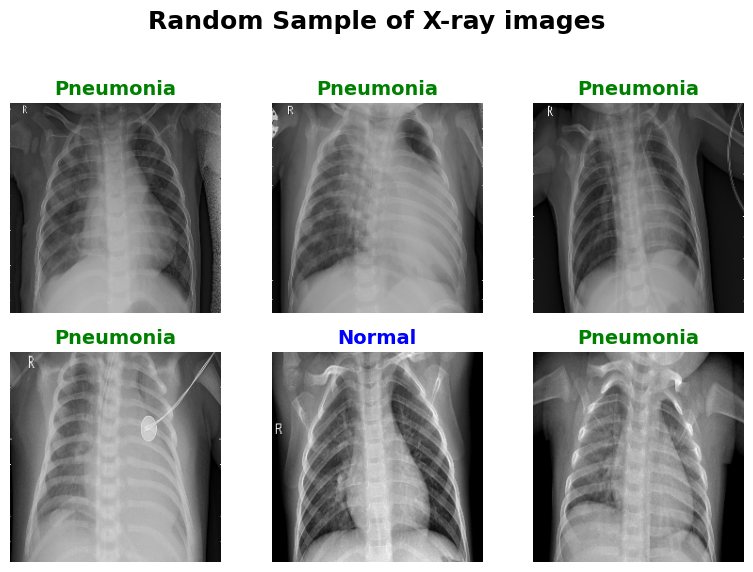

In [28]:

data, data_labels = load_data(data_path)

# load random data
random_indices = np.random.choice(len(data), 6, replace=False)

#Set up the figure
plt.figure(figsize=(8,8))

# Plot the images
for i, index in enumerate(random_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(data[index], cmap='gray')
    plt.title(
        'Normal' if data_labels[index] == 0 else 'Pneumonia',
        fontsize=14,
        fontweight='bold',
        color='blue' if data_labels[index] == 0 else 'green'
    )
    plt.axis('off')

# Add a main title
plt.suptitle(
    "Random Sample of X-ray images",
    fontsize=18,
    fontweight='bold',
    y=1.02
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()